**Qualitative analysis of a periodically-kicked oscillator of Lin and Young (2010) map using simulations in Julia**

Bruno Jacob  
Department of Mechanical Engineering, UCSB  
bruno@engineering.ucsb.edu


   
   

 First, let's load some Julia libraries

In [22]:
using Plots        # used to plot nice figures
using LaTeXStrings # used to translate strings to latex in Plots
pgfplotsx()        # select pgfplots backend
;

The model is given by the following map

\begin{align}
\theta_{\tau} & = \theta_0 + \tau + \frac{\sigma}{\lambda} \left[y_0 + A \sin(2 \pi \theta_0) (1 - e^{-\sigma \tau}) \right] \mod(1)\\
y_{\tau} & = e^{-\sigma \tau} \left[ y_0 + A \sin(2 \pi \theta_0) \right]\\
\end{align}

where $(\theta,y) \in \mathbb{S}^1 \times \mathbb{R}$, and $\sigma, \lambda, A, \tau$ are constants with $\sigma, \lambda, \tau > 0$.

For our parametric study, the parameters of interest are:

\begin{align}
\sigma &= \text{amount of shear}, \\
\lambda &= \text{rate of contraction to the limit cycle} \, \gamma = \{y=0\}, \\   
A &= \text{amplitude of kicks}, \\
\tau &= \text{time interval between kicks}.
\end{align}

**Step 1**: input the model and integration parameters

In [128]:
# Model parameters
σ    = [0.05,0.25,0.5,2.0] # amount of shear
λ    = 0.1                 # rate of contraction
A    = 0.1                 # amplitude of kicks
τ    = 10.0                # time interval between kicks
tmax = 400.0               # maximum integration time

nt = Int64(tmax/τ)            # number of time intervals
;

and the initial conditions...

In [135]:
# Initial conditions (range between 0 and 1.0 with step 0.01)
θ0 = 0.0:0.01:1.0  
y0 = -1.0:0.5:1.0  
;

**Step 2**: create a function to iterate the map

In [136]:
# Function that iterates the map nt times with parameters stored in array p, and returns u_τ
function compute_map(p,u,nt)

    # Initialize u0 (matrix with 2 rows and nt columns)
    u_τ = zeros(Float64,2,nt)
    
    # Unwrap parameters
    σ,λ,A,τ = p
        
    # First values
    θ0,y0 = u

    # Perform nt iterations
    for i = 2:nt
        # Compute one iteration
        u_τ[1,i] = θ0 + τ + (σ/λ) * (y0 + A * sin(2.0*pi*θ0) * (1.0-exp(-σ*τ)) );
        u_τ[1,i] = u_τ[1,i]%1;
        u_τ[2,i] = exp(-σ*τ) * (y0 + A*sin(2.0*pi*θ0));
        
        # Update variables
        θ0,y0 = u_τ[:,i]
    end
    
    return u_τ

end
;

**Step 3**: we can now simulate the problem

In [137]:
# Solve problem

# initialize plots (one for each value of k)
plot_array = Any[]

for i=1:length(σ)
   push!(plot_array,plot()) 
end

# iterate over σ values
for m=1:length(σ)
  
    # parameter array
    p = [σ[m],λ,A,τ]    

    # iterate over θ0 values 
    for i=1:length(θ0)
        
        # iterate over y0 values
        for j=1:length(y0)
        
            # initial conditions
            u = [θ0[i],y0[j]]

            # iterate map
            u_τ = compute_map(p,u,nt)
            
            # plot solution
            plot!(plot_array[m],
                 [u_τ[1,:].%1],[u_τ[2,:]],
                 seriestype=:scatter,
                 xlabel=L"\theta",
                 ylabel=L"y",
                 guidefont=font(20),
                 tickfont=font(10),
                 markercolor="black",
                 markersize = 1.0,
                 framestyle =:box,
                 grid=(:on,0.5,0.15),
                 xlim=(0,1),
                 legend=false,
                 title = latexstring("\$ \\sigma = $(p[1]) \$"),
                 fmt=:png)
        end
    end
end

;

**Results**

The plot for the case where $\sigma = 0.05$ is shown below. At first, we can see that a sink dominates the phase space.

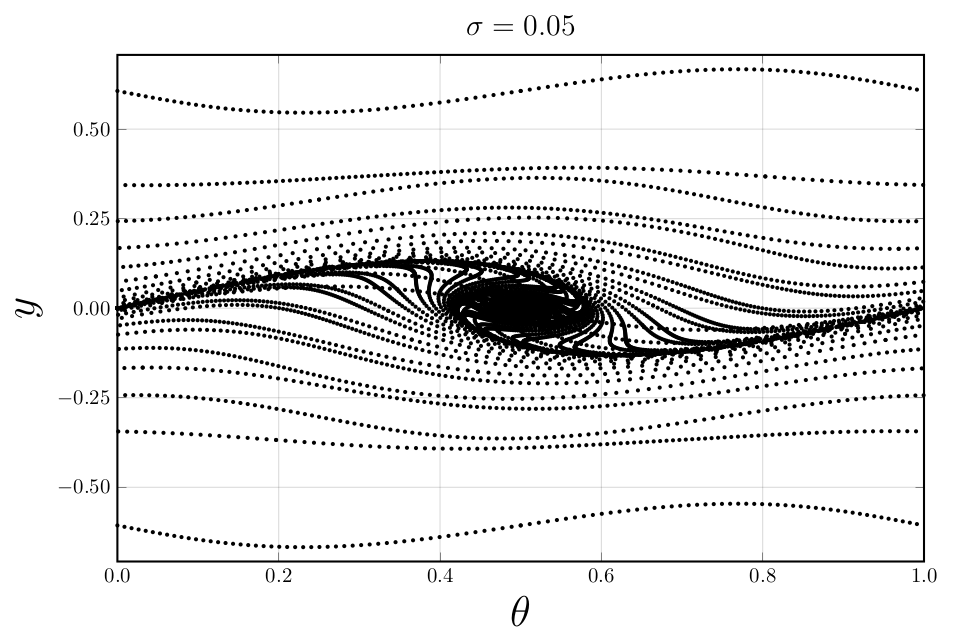

In [138]:
# Plots case with σ = 0.05
display(plot(plot_array[1]))

For $\sigma = 0.25$, the plot is shown below. The sink starts to degenerate. Notice that at $\theta = 0.5$, the sink becomes twisted.

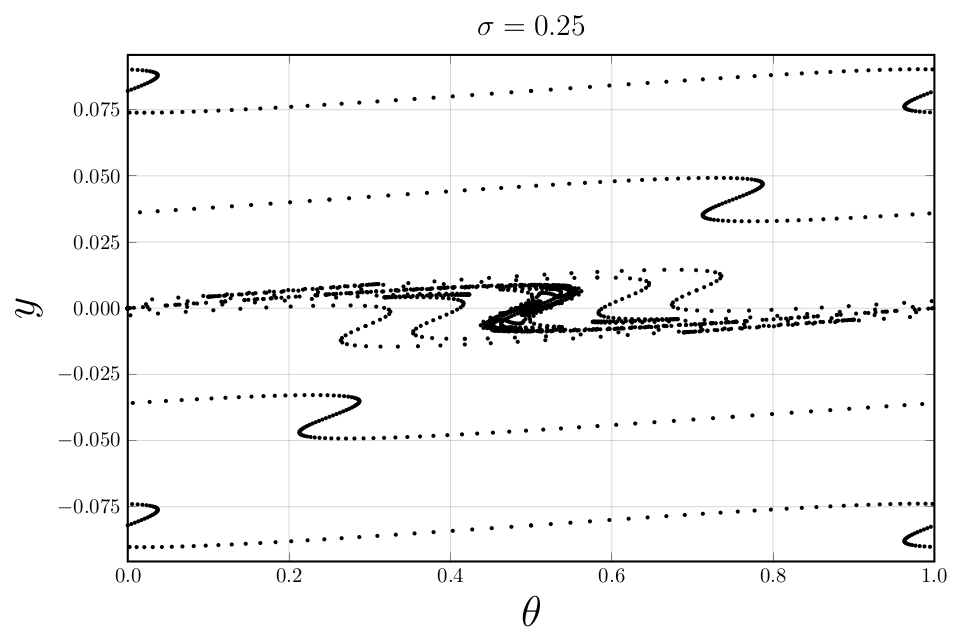

In [139]:
# Plots case with σ = 0.25
display(plot(plot_array[2]))

For $\sigma = 0.5$, the plot is shown below. As the sink becomes more and more twisted, a Smale’s horseshoe starts to develop.

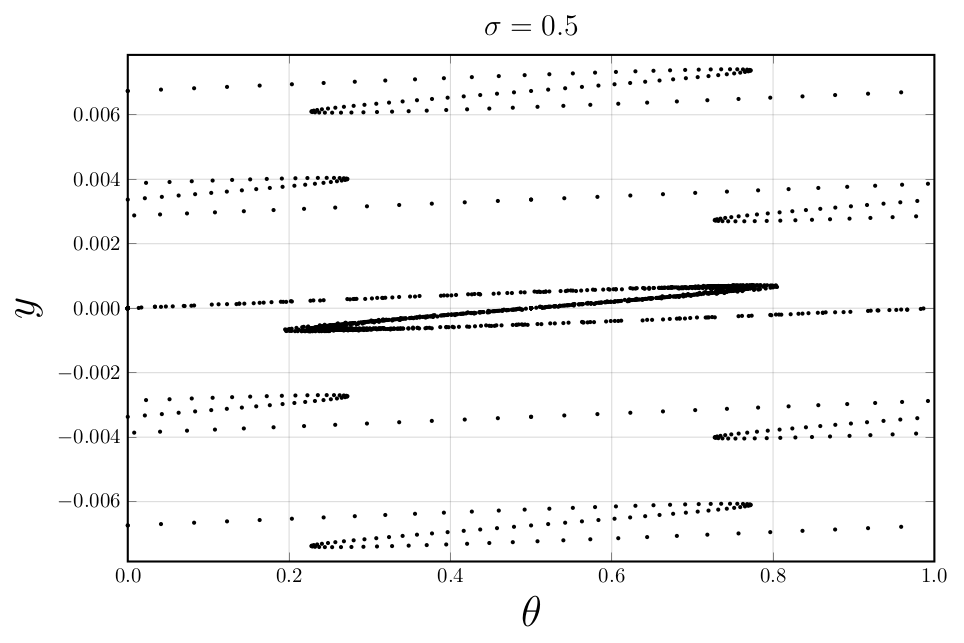

In [140]:
# Plots case with σ = 0.5
display(plot(plot_array[3]))

Finally, for $\sigma = 1.0$, the plot is shown below. As we can see, the foldings loop over the cylinder.

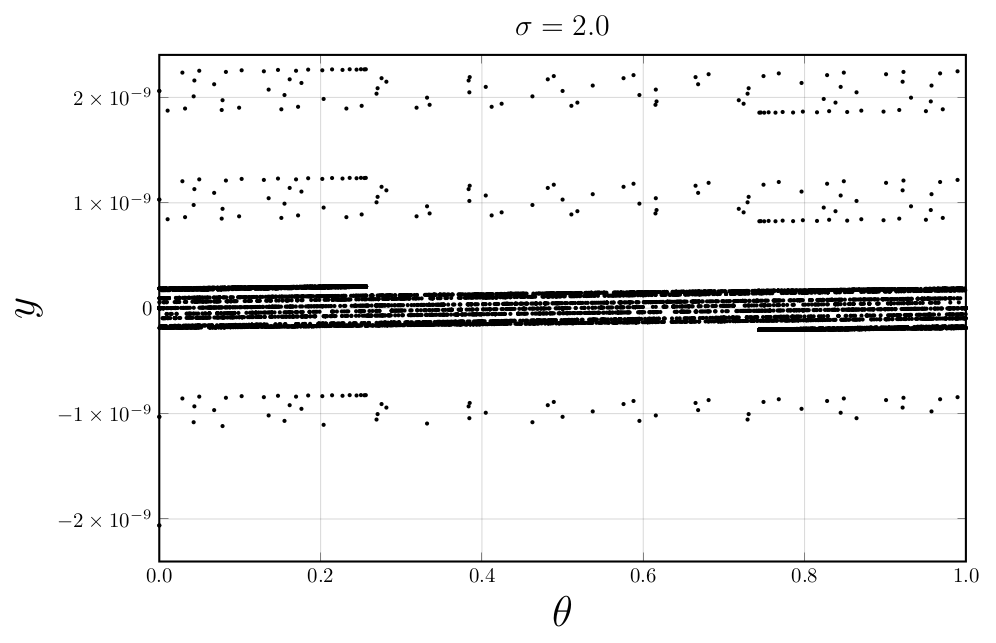

In [141]:
# Plots case with σ = 2.0
display(plot(plot_array[4]))

**Key remarks**  

* The increase of $\sigma$ clearly promotes folding creation, leading to the development of Smale’s horseshoes.
* As a consequence of the effect of $\sigma$, increasing $\sigma$ causes the increase in the difference in velocity between two points with different $y$ coordinates.
* For $\sigma$ large enough, folds start wrapping around the cylinder.
